In [87]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [88]:
# # Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# Loading Dataset
df = pd.read_csv('./files/dataset.csv')
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [90]:
# Checking dataset shape
df.shape

(22000, 2)

In [91]:
# Checking for missing values
print(df.isnull().sum())

Text        0
language    0
dtype: int64


In [92]:
# Counting occurrences of each language
df["language"].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

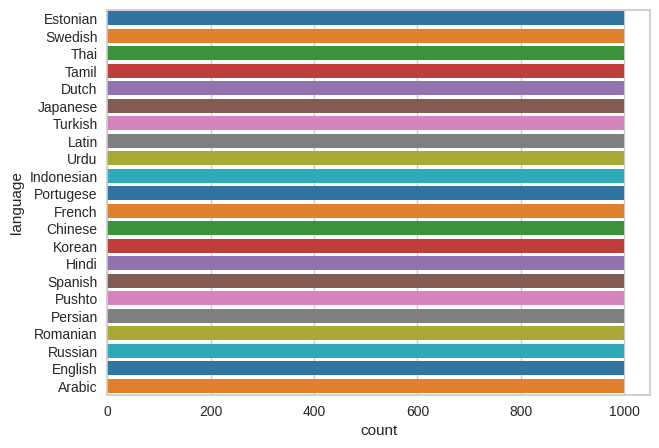

In [93]:
# Visualizing distribution of languages before removing duplicates
plt.figure(figsize=(7,5))
sns.countplot(y="language", data=df, hue="language", palette="tab10", legend=False)
plt.show()

In [94]:
# Removing duplicate rows based on 'Text' column
df = df.drop_duplicates(subset='Text')
df = df.reset_index(drop=True)

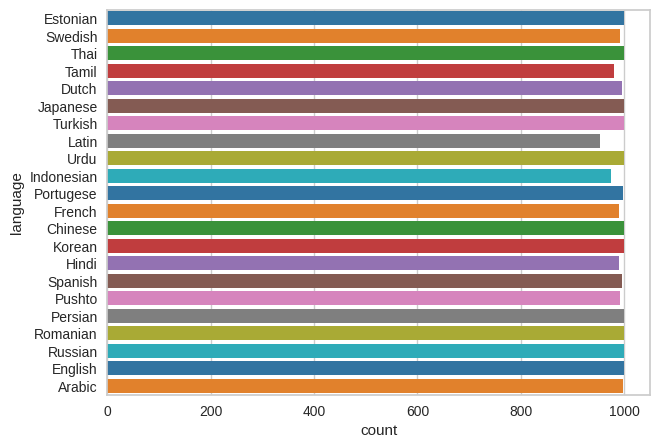

In [95]:
# Visualizing distribution of languages after removing duplicates
plt.figure(figsize=(7,5))
sns.countplot(y="language", data=df, hue="language", palette="tab10", legend=False)
plt.show()

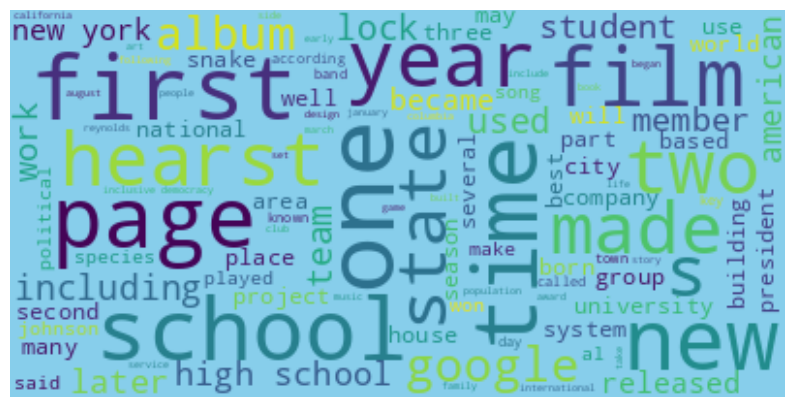

In [96]:
# Creating a word cloud for English text
english_text_df = df[df['language'] == 'English']
stopwords = set(STOPWORDS)
text2 = "  ".join(review for review in english_text_df['Text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="skyblue", stopwords=stopwords).generate(text2)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [97]:
# Encoding target variable
le = LabelEncoder()
df["language"]=le.fit_transform(df["language"])

In [98]:
# Displaying unique encoded languages
df["language"].unique()

array([ 4, 17, 19, 18,  2,  8, 20, 10, 21,  7, 12,  5,  1,  9,  6, 16, 13,
       11, 14, 15,  3,  0])

In [99]:
# Decoding encoded languages
decoded_languages = le.inverse_transform(df["language"])
df["decoded_language"] = decoded_languages
unique_decoded_languages = sorted(df["decoded_language"].unique())
unique_languages = sorted(df["language"].unique())

print("Unique Decoded Languages (Ascending Order):", unique_decoded_languages)
print("Unique Languages (Ascending Order):", unique_languages)

Unique Decoded Languages (Ascending Order): ['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French', 'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian', 'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu']
Unique Languages (Ascending Order): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [100]:
# Displaying DataFrame's first few rows
df.head()

,Text,language,decoded_language
0,klement gottwaldi surnukeha palsameeriti ning ...,4,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,17,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18,Tamil
4,de spons behoort tot het geslacht haliclona en...,2,Dutch


In [101]:
# Calculating average text length
total_length = sum(len(text) for text in df["Text"])
num_texts = len(df["Text"])
average_length = total_length / num_texts
print("Average text length:", average_length)

Average text length: 356.76632050871495


# Data Preprocessing (Cleaning)

In [102]:
# Downloading NLTK stopwords
import nltk
nltk.download('stopwords')

# Preprocessing text data
from nltk.corpus import stopwords
import re
import unicodedata
from bs4 import BeautifulSoup

def clean_text(text):
    # Remove HTML tags if present
    if "<" in text:
        text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(filtered_words)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
# Applying text preprocessing
df["Text"] = df["Text"].apply(clean_text)

In [104]:
# Displaying preprocessed data
df.head()

,Text,language,decoded_language
0,klement gottwaldi surnukeha palsameeriti ning ...,4,Estonian
1,sebes joseph pereira thomas pa eng jesuits sin...,17,Swedish
2,thanon charoen krung,19,Thai
3,,18,Tamil
4,de spons behoort tot het geslacht haliclona en...,2,Dutch


In [105]:
# Feature Engineering
X = df["Text"]
Y = df["language"]

In [106]:
# Transforming text data into TF-IDF vectors
tf = TfidfVectorizer()
train_data = tf.fit_transform(X)
print(train_data)

  (0, 43306)	0.15263015029848503
  (0, 121297)	0.15263015029848503
  (0, 75886)	0.13905116474443155
  (0, 45412)	0.15263015029848503
  (0, 112365)	0.13905116474443155
  (0, 43300)	0.15263015029848503
  (0, 74618)	0.22923768231595815
  (0, 164)	0.2157378281560049
  (0, 55029)	0.2681296178123534
  (0, 63283)	0.24362766441999023
  (0, 121296)	0.15263015029848503
  (0, 59180)	0.15263015029848503
  (0, 6236)	0.11021371732262658
  (0, 67319)	0.15263015029848503
  (0, 105440)	0.08297130429700278
  (0, 116787)	0.1340648089061767
  (0, 147)	0.0851438968912264
  (0, 111466)	0.15263015029848503
  (0, 60633)	0.1466213534677978
  (0, 48973)	0.15263015029848503
  (0, 44905)	0.1227702618842477
  (0, 79965)	0.15263015029848503
  (0, 78860)	0.15263015029848503
  (0, 52850)	0.13015043627376727
  (0, 46676)	0.1466213534677978
  :	:
  (21858, 85764)	0.2041228392825015
  (21858, 101917)	0.1903852425884585
  (21858, 101107)	0.1960868603664554
  (21858, 68984)	0.3921737207329108
  (21858, 89689)	0.1859627242

In [107]:
# Splitting data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(train_data, Y, test_size=0.2, random_state=42)

In [108]:
# Printing total train and test values
print("Total samples in training set (X_train, Y_train):", X_train.shape[0], Y_train.shape[0])
print("Total samples in testing set (X_test, Y_test):", X_test.shape[0], Y_test.shape[0])

Total samples in training set (X_train, Y_train): 17487 17487
Total samples in testing set (X_test, Y_test): 4372 4372


In [109]:
# Model Building
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [110]:
# Model Evaluation
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.90%


# Confusion Matrix

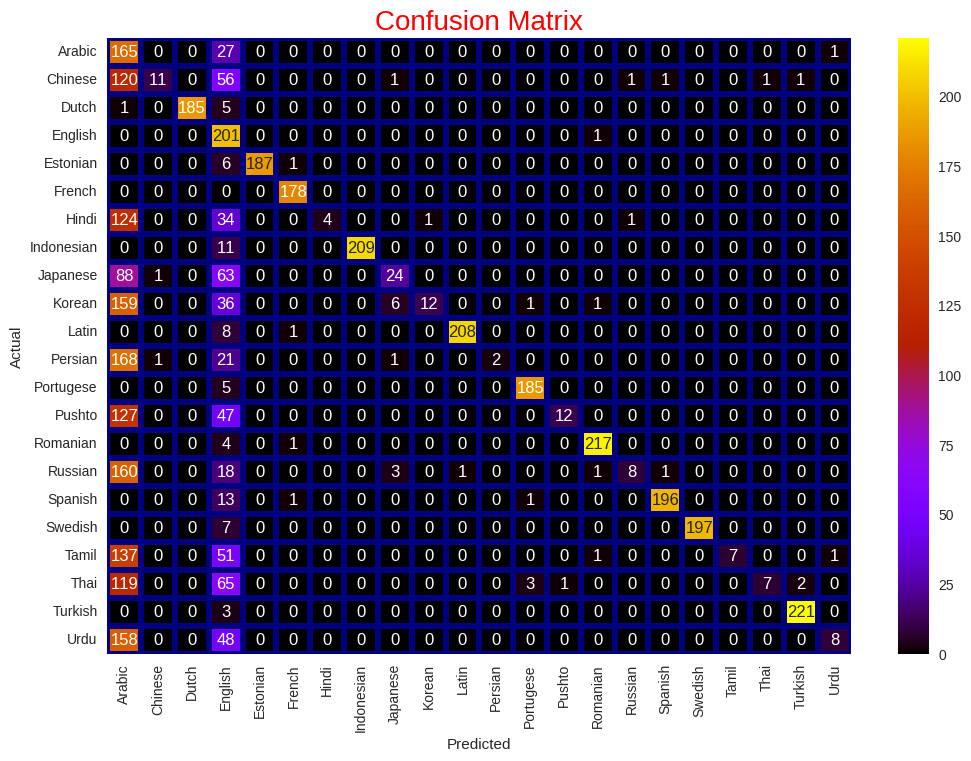

In [111]:
# Confusion Matrix
cf = confusion_matrix(Y_test, y_pred)
label_name = unique_decoded_languages

# Visualizing Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf, annot=True, fmt="d", xticklabels=label_name, yticklabels=label_name, cmap="gnuplot", linewidths=3, linecolor='navy')
plt.title("Confusion Matrix", fontsize=20, color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report

In [112]:
# Classification Report
print(classification_report(Y_test, y_pred, target_names=label_name))
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

              precision    recall  f1-score   support

      Arabic       0.11      0.85      0.19       193
     Chinese       0.85      0.06      0.11       192
       Dutch       1.00      0.97      0.98       191
     English       0.28      1.00      0.43       202
    Estonian       1.00      0.96      0.98       194
      French       0.98      1.00      0.99       178
       Hindi       1.00      0.02      0.05       164
  Indonesian       1.00      0.95      0.97       220
    Japanese       0.69      0.14      0.23       176
      Korean       0.92      0.06      0.11       215
       Latin       1.00      0.96      0.98       217
     Persian       1.00      0.01      0.02       193
   Portugese       0.97      0.97      0.97       190
      Pushto       0.92      0.06      0.12       186
    Romanian       0.98      0.98      0.98       222
     Russian       0.80      0.04      0.08       192
     Spanish       0.99      0.93      0.96       211
     Swedish       1.00    

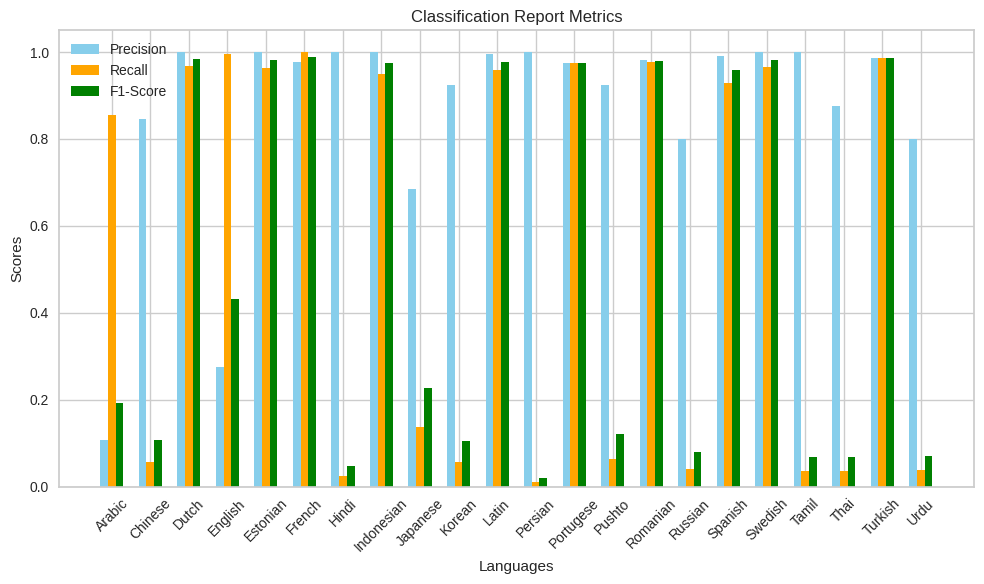

In [113]:
# Extracting classification report into a dictionary
classification_report_dict = classification_report(Y_test, y_pred, target_names=label_name, output_dict=True)

# Creating lists to store precision, recall, and F1-score for each class
precision = [classification_report_dict[label]['precision'] for label in label_name]
recall = [classification_report_dict[label]['recall'] for label in label_name]
f1_score = [classification_report_dict[label]['f1-score'] for label in label_name]

# Plotting the scores
plt.figure(figsize=(10, 6))
x = np.arange(len(label_name))
bar_width = 0.2
plt.bar(x, precision, width=bar_width, label='Precision', color='skyblue')
plt.bar(x + bar_width, recall, width=bar_width, label='Recall', color='orange')
plt.bar(x + 2*bar_width, f1_score, width=bar_width, label='F1-Score', color='green')
plt.xlabel('Languages')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x + bar_width, label_name, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Roc Auc

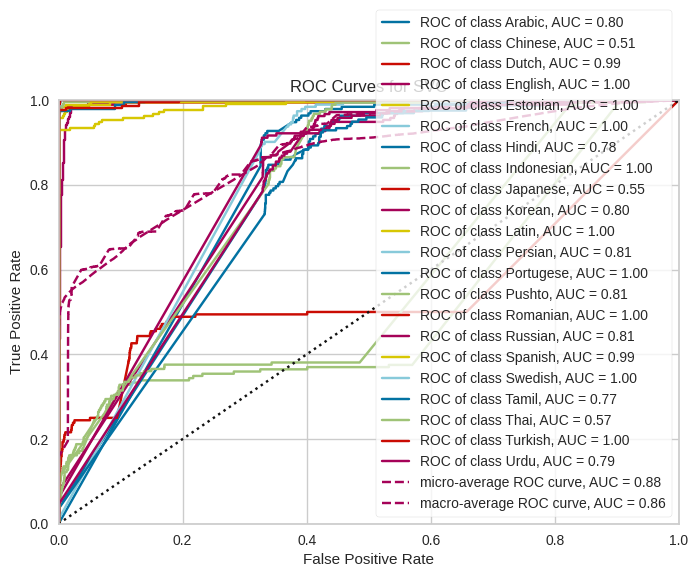

<Figure size 3000x1500 with 0 Axes>

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [114]:
from yellowbrick.classifier import ROCAUC

# Creating SVC model & ROCAUC visualizer.
model = SVC()
visualizer = ROCAUC(model, classes=label_name)

# Visualizer: Fit, score, and display.
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
plt.figure(figsize=(30, 15))
visualizer.show()

# Naive Bayes

In [115]:
from sklearn.naive_bayes import MultinomialNB

# Fitting Multinomial Naive Bayes (NB) model.
nb = MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [116]:
# Model Evaluation
pred1 = nb.predict(X_test)
accuracy1 = accuracy_score(Y_test, pred1)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 57.00%


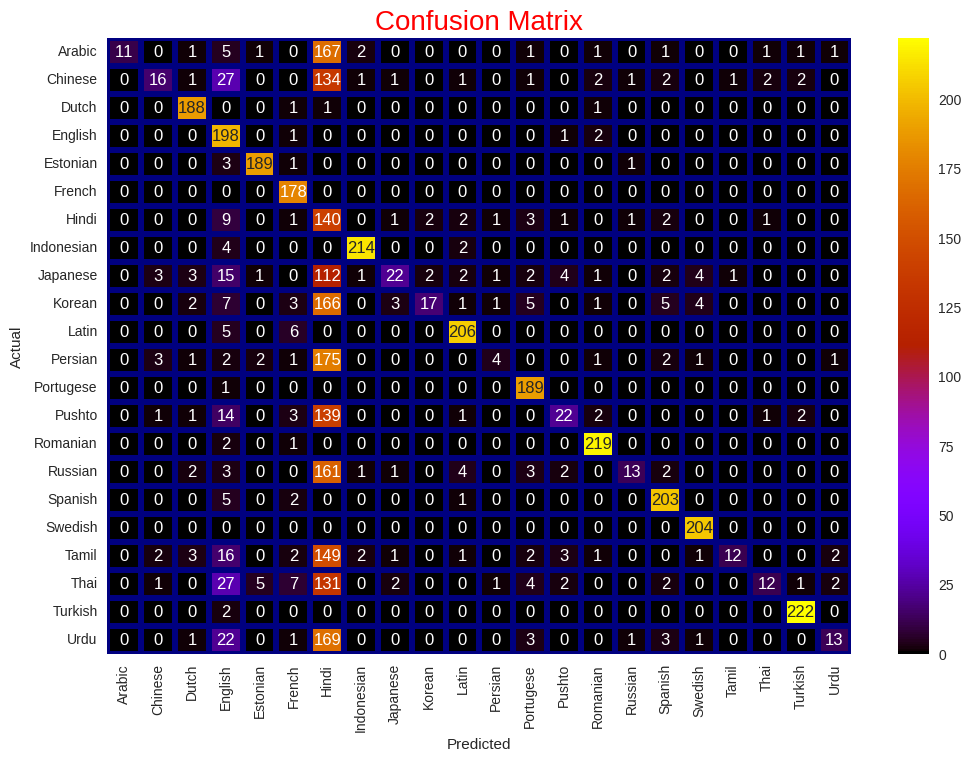

In [117]:
# Confusion Matrix
cf0 = confusion_matrix(Y_test, pred1)
label_name = unique_decoded_languages

# Visualizing Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf0, annot=True, fmt="d", xticklabels=label_name, yticklabels=label_name, cmap="gnuplot", linewidths=3, linecolor='navy')
plt.title("Confusion Matrix", fontsize=20, color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [118]:
# Classification Report
print(classification_report(Y_test, pred1, target_names=label_name))
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

              precision    recall  f1-score   support

      Arabic       1.00      0.06      0.11       193
     Chinese       0.62      0.08      0.15       192
       Dutch       0.93      0.98      0.95       191
     English       0.54      0.98      0.70       202
    Estonian       0.95      0.97      0.96       194
      French       0.86      1.00      0.92       178
       Hindi       0.09      0.85      0.15       164
  Indonesian       0.97      0.97      0.97       220
    Japanese       0.71      0.12      0.21       176
      Korean       0.81      0.08      0.14       215
       Latin       0.93      0.95      0.94       217
     Persian       0.50      0.02      0.04       193
   Portugese       0.89      0.99      0.94       190
      Pushto       0.63      0.12      0.20       186
    Romanian       0.95      0.99      0.97       222
     Russian       0.76      0.07      0.12       192
     Spanish       0.91      0.96      0.93       211
     Swedish       0.95    

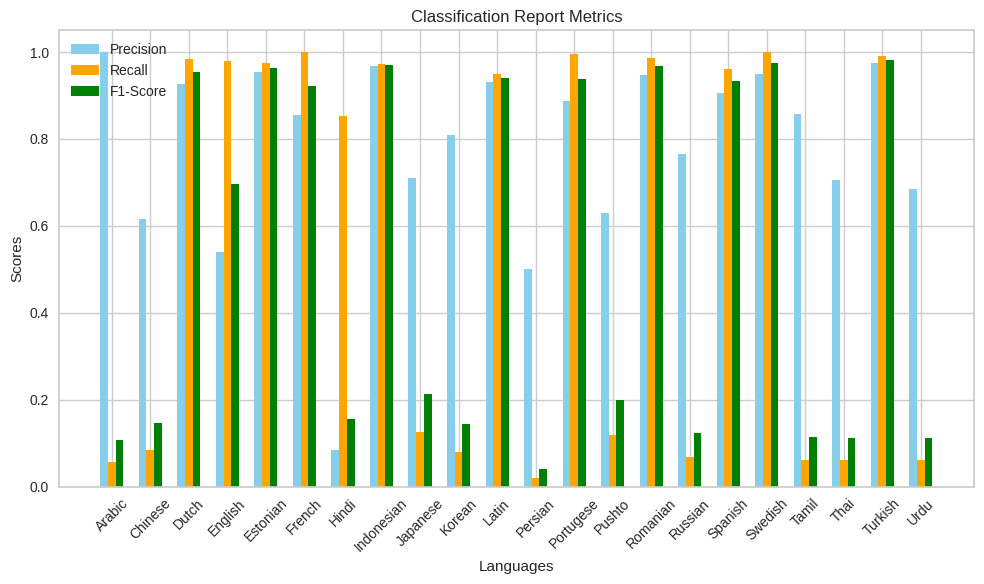

In [119]:
# Extracting classification report into a dictionary
classification_report_dict = classification_report(Y_test, pred1, target_names=label_name, output_dict=True)

# Creating lists to store precision, recall, and F1-score for each class
precision = [classification_report_dict[label]['precision'] for label in label_name]
recall = [classification_report_dict[label]['recall'] for label in label_name]
f1_score = [classification_report_dict[label]['f1-score'] for label in label_name]

# Plotting the scores
plt.figure(figsize=(10, 6))
x = np.arange(len(label_name))
bar_width = 0.2
plt.bar(x, precision, width=bar_width, label='Precision', color='skyblue')
plt.bar(x + bar_width, recall, width=bar_width, label='Recall', color='orange')
plt.bar(x + 2*bar_width, f1_score, width=bar_width, label='F1-Score', color='green')
plt.xlabel('Languages')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x + bar_width, label_name, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

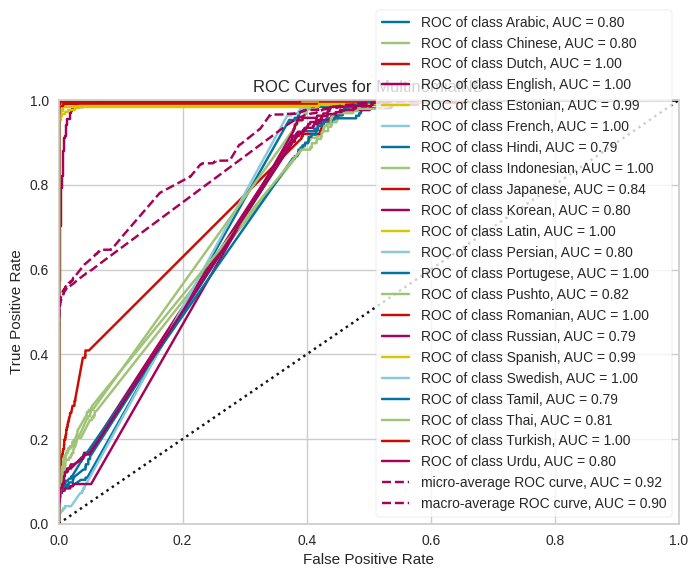

<Figure size 3000x1500 with 0 Axes>

<Axes: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [120]:
# Creating MultinomialNB model & ROCAUC visualizer.
model = MultinomialNB()
visualizer = ROCAUC(model, classes=label_name)

# Visualizer: Fit, score, and display.
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
plt.figure(figsize=(30, 15))
visualizer.show()

# CountVectorizer

In [121]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Feature Engineering
X_data = df["Text"]
Y_data = df["language"]

In [122]:
# Transforming text data Count vectors
vectorizer = CountVectorizer()
new_data = vectorizer.fit_transform(X_data)

In [123]:
# Splitting data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(new_data, Y_data, test_size=0.2, random_state=42)

In [124]:
# Printing total train and test values
print("Total samples in training set (x_train, y_train):", x_train.shape[0], y_train.shape[0])
print("Total samples in testing set (x_test, y_test):", x_test.shape[0], y_test.shape[0])

Total samples in training set (x_train, y_train): 17487 17487
Total samples in testing set (x_test, y_test): 4372 4372


In [125]:
# Model Building
new_svm = SVC()
new_svm.fit(x_train, y_train)

SVC()

In [126]:
# Model Evaluation
new_pred = new_svm.predict(x_test)
accuracy = accuracy_score(y_test, new_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 52.68%


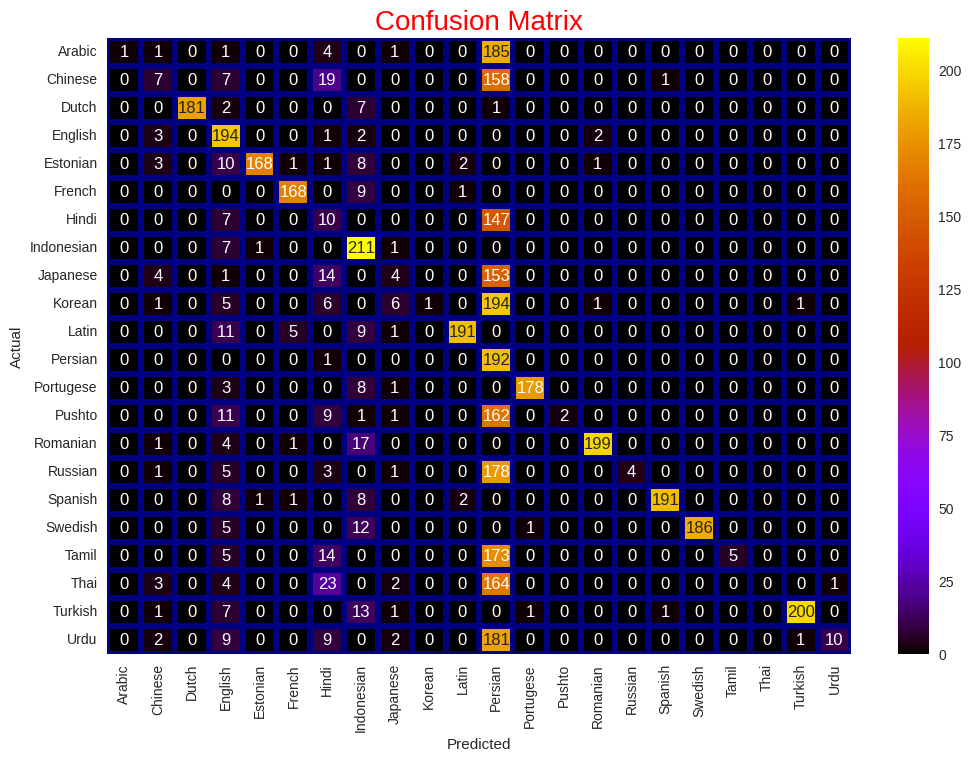

In [127]:
# Confusion Matrix
cf2 = confusion_matrix(y_test, new_pred)
label_name = unique_decoded_languages

# Visualizing Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf2, annot=True, fmt="d", xticklabels=label_name, yticklabels=label_name, cmap="gnuplot", linewidths=3, linecolor='navy')
plt.title("Confusion Matrix", fontsize=20, color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [128]:
# Classification Report
print(classification_report(y_test, new_pred, target_names=label_name))
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

              precision    recall  f1-score   support

      Arabic       1.00      0.01      0.01       193
     Chinese       0.26      0.04      0.06       192
       Dutch       1.00      0.95      0.97       191
     English       0.63      0.96      0.76       202
    Estonian       0.99      0.87      0.92       194
      French       0.95      0.94      0.95       178
       Hindi       0.09      0.06      0.07       164
  Indonesian       0.69      0.96      0.80       220
    Japanese       0.19      0.02      0.04       176
      Korean       1.00      0.00      0.01       215
       Latin       0.97      0.88      0.92       217
     Persian       0.10      0.99      0.18       193
   Portugese       0.99      0.94      0.96       190
      Pushto       1.00      0.01      0.02       186
    Romanian       0.98      0.90      0.94       222
     Russian       1.00      0.02      0.04       192
     Spanish       0.99      0.91      0.95       211
     Swedish       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


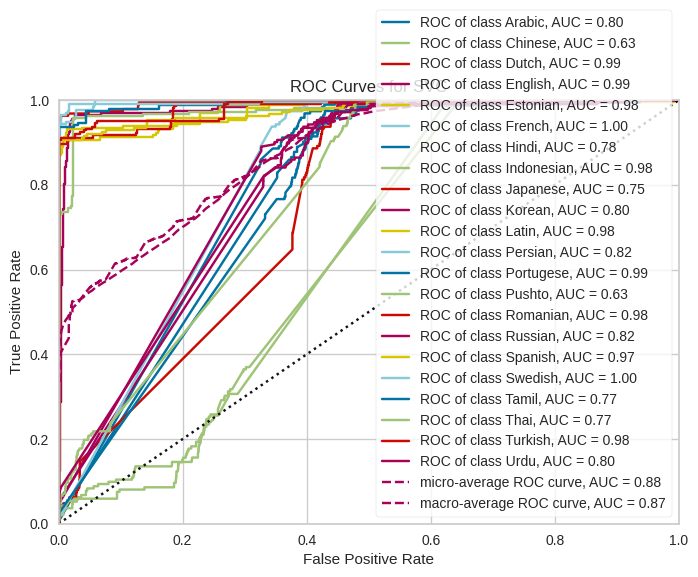

<Figure size 3000x1500 with 0 Axes>

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [129]:
# Creating SVC model & ROCAUC visualizer.
new_model = SVC()
visualizer = ROCAUC(new_model, classes=label_name)

# Visualizer: Fit, score, and display.
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
plt.figure(figsize=(30, 15))
visualizer.show()

# Naive Bayes + Countvectorizer

In [130]:
# Fitting Multinomial Naive Bayes (NB) model.
new_nb = MultinomialNB()
new_nb.fit(x_train, y_train)

MultinomialNB()

In [131]:
# Model Evaluation
pred3 = nb.predict(x_test)
accuracy1 = accuracy_score(y_test, pred3)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 56.70%


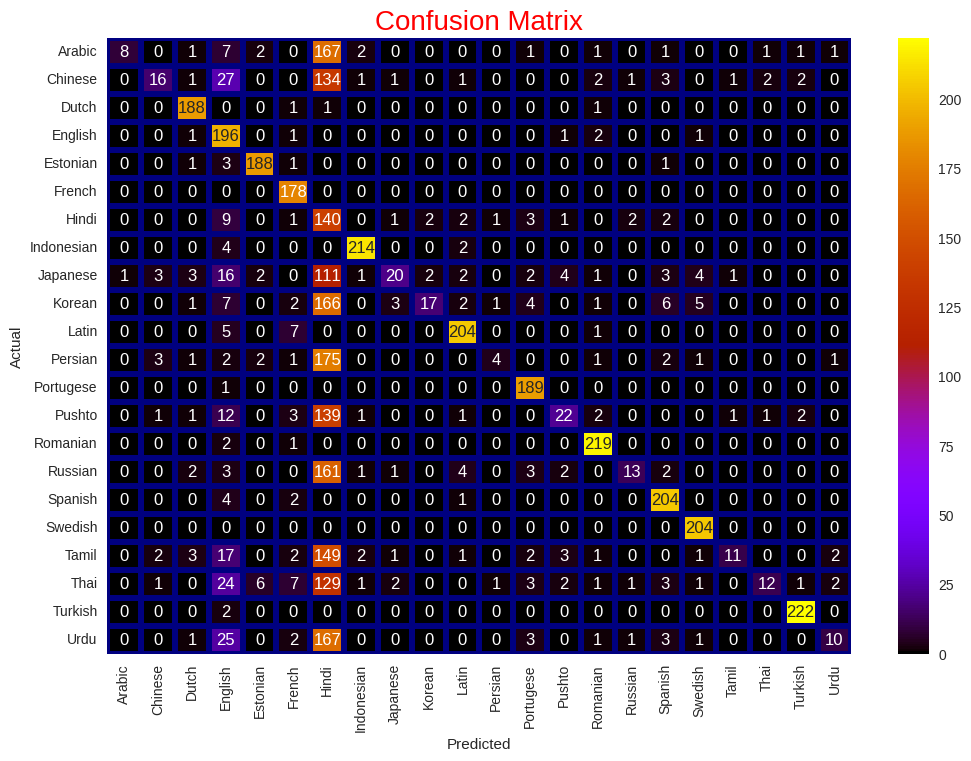

In [132]:
# Confusion Matrix
cf4 = confusion_matrix(y_test, pred3)
label_name = unique_decoded_languages

# Visualizing Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf4, annot=True, fmt="d", xticklabels=label_name, yticklabels=label_name, cmap="gnuplot", linewidths=3, linecolor='navy')
plt.title("Confusion Matrix", fontsize=20, color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [133]:
# Classification Report
print(classification_report(y_test, pred3, target_names=label_name))
print(f"Overall Accuracy: {accuracy1 * 100:.2f}%")

              precision    recall  f1-score   support

      Arabic       0.89      0.04      0.08       193
     Chinese       0.62      0.08      0.15       192
       Dutch       0.92      0.98      0.95       191
     English       0.54      0.97      0.69       202
    Estonian       0.94      0.97      0.95       194
      French       0.85      1.00      0.92       178
       Hindi       0.09      0.85      0.16       164
  Indonesian       0.96      0.97      0.97       220
    Japanese       0.69      0.11      0.20       176
      Korean       0.81      0.08      0.14       215
       Latin       0.93      0.94      0.93       217
     Persian       0.57      0.02      0.04       193
   Portugese       0.90      0.99      0.94       190
      Pushto       0.63      0.12      0.20       186
    Romanian       0.94      0.99      0.96       222
     Russian       0.72      0.07      0.12       192
     Spanish       0.89      0.97      0.93       211
     Swedish       0.94    

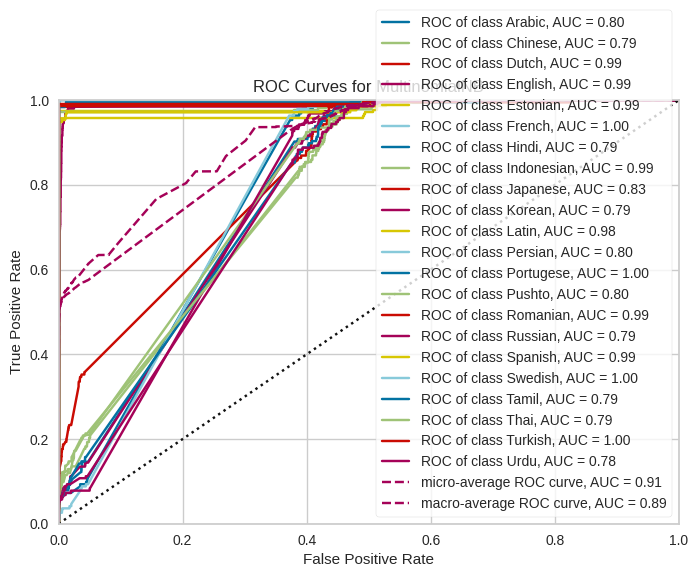

<Figure size 3000x1500 with 0 Axes>

<Axes: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [134]:
# Creating MultinomialNB model & ROCAUC visualizer.
new_mo = MultinomialNB()
visualizer = ROCAUC(new_mo, classes=label_name)

# Visualizer: Fit, score, and display.
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
plt.figure(figsize=(30, 15))
visualizer.show()